# P1 Milestone

## Beginning of Baseline Model Performance:  

In [1]:
# Installing Dependencies and or code for setting up virtual environment: 
# Necessary imports
%uv pip install pandas 
%uv pip install numpy 
%uv pip install yfinance 
# Below is needed to get the real-time data
%uv pip install datetime
# UPDATE: timedelta will be used to programmatically do the optimality algorithm. Refer to notes on timedelta class for reference.  
%uv pip install pdb 
%uv pip install tensorflow 
%uv pip install matplotlib
# from matplotlib import pyplot 
%uv pip install pandas 
%uv pip install numpy 
%uv pip install pdb 
%uv pip install tensorflow
# End of Installing Dependencies and or code for setting up virtual environment: 

Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv
c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv
c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv
c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv

Note: you may need to restart the kernel to use updated packages.



c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv

Note: you may need to restart the kernel to use updated packages.


- Context: First we do the data preprocessing before it meets with the model[part a)]: [note, make habit to employ content-codeSnippet pairs!]


## Beginning of new, cleaned version of code

### Beginning of Data Engineering Procedure

In [2]:
# Necessary imports
import pandas as pd;
import numpy as np;
import yfinance as yf; #<-- Needed to access Yahoo Finance Dataset(s)
# Below is needed to get the real-time data
from datetime import datetime, timedelta, date
# UPDATE: timedelta will be used to programmatically do the optimality algorithm. Refer to notes on timedelta class for reference.
import pdb as pb
# End of Necessary imports
global seriesVersionOn
seriesVersionOn = True
global resultantDataFrame
resultantDataFrame: pd.DataFrame = pd.DataFrame(columns=["P/B", "P/E", "NCAV", "Date For Eval", "Company", "Optimality"])
resultantDataFrame["P/B"].astype("Float64")
resultantDataFrame["P/E"].astype("Float64")
resultantDataFrame["NCAV"].astype("Float64")
class subsys1:
    def __init__(self,param1 = """Insert any params that may be sufficient here!"""):
        print("---Subsystem 1 in Progress---")
    # component a) [mapping formulas using dep vars and indep vars]
    def compA(self,company):
        PRatioBug = True
        print("--Component a[Subsystem 1] in progress--")
        global arrOfDataFramesNeeded
        arrOfDataFramesNeeded = []
        # Obtaining the dataframes from the yfinance api for company i
        print("-Obtaining the DataFrames from the yfinance api for company i-")
        timePeriod = "4mo"
        timeInterval = "1mo"
        # Obtaining real-time data
        if (company == None):
            company = "MSFT"
        # companyAlias = company or "MSFT"
        companyAlias = company
        ticker = yf.Ticker(f"{companyAlias}")
        global end_date #<-- Setting global so end_date can be accessed.
        start_date: datetime = datetime.today() - timedelta(days=10) ; end_date = datetime.today()
        #^^ Setting start_date and end_date as arbitrary value relative to current day and current day respectively.
        yearsRelToDateInQ: datetime =  start_date - timedelta(days=5*365)
        start_date = start_date.date().isoformat()
        end_date = end_date.date().isoformat()
        historical_data = ticker.history(period=timePeriod, interval=timeInterval).tz_localize(None) if start_date == None and end_date == None else ticker.history(start=start_date, end=end_date).tz_localize(None)
        print(historical_data)
        # end of Obtaining real-time data
        # Obtaining historical data
        quarterlyBalanceSheet = ticker.quarterly_balance_sheet.T
        arrOfDataFramesNeeded = [historical_data, quarterlyBalanceSheet]
        print(quarterlyBalanceSheet)
        print(quarterlyBalanceSheet.columns)
        conditionForDataFrame2 = ticker.history(period="5y").tz_localize(None) #<-- Here, I set start date to first tuple's date from historical_data var and then get the data 5 yrs BACK relative to that date.
        balanceSheet = ticker.balance_sheet.T
        print(conditionForDataFrame2)
        arrOfDataFramesNeeded.append([conditionForDataFrame2])
        # end of Obtaining historical data
        print("-End of Obtaining the DataFrames from the yfinance api for company i-")
        # CHECKPOINT #1: At this point, datafmres will be obtained to begin process of assigning formulas.
        # End of Obtaining the dataframes from the yfinance api for company i
        boolExpMain = """Can insert a bool exp that checks for number of values in company column, indicating that dataFrame still exists"""
        alreadyExists = False if boolExpMain == True else True
        print("-Beginning of assigning formulas-")
        global independentVars
        independentVars = ["Close" if PRatioBug == False else "Open","Tangible Book Value","High","Retained Earnings","Net Tangible Assets"]
        global DependentVars
        DependentVars = ["P/B", "P/E", "NCAV", "Date For Eval"] #<-- PN: Date for Eval was created to reference the date to use to make relevant decisions.
        DependentVars.append("Share Price")
        global dataFramesToBeShipped
        dataFramesToBeShipped = [pd.DataFrame(), pd.DataFrame()]
        DependentVars.append("Company")
        # NOTE: alreadyExists prevents currentDataframe from being updated allowing other companies to be added to resultant dataframe.
        # Assigning the formulas
        print("-Assigning formulas-") # PARTITION #1: Need to split code off when porting to notebook here!
        pullingFromTickerInfo = True
        if not PRatioBug:
            dataFramesToBeShipped[0].loc[0,DependentVars[0]] = arrOfDataFramesNeeded[0].loc[arrOfDataFramesNeeded[0].index[0].date().isoformat(),independentVars[0]]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]]
            print("---")
            print(arrOfDataFramesNeeded[0].columns)
            print("---")
            print(arrOfDataFramesNeeded[0].loc[arrOfDataFramesNeeded[0].index[0].date().isoformat(),independentVars[0]])
            print(arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]])
            dataFramesToBeShipped[0].loc[0,DependentVars[1]] = arrOfDataFramesNeeded[0].loc[arrOfDataFramesNeeded[0].index[0].date().isoformat(),independentVars[2]]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[3]]
            dataFramesToBeShipped[0].loc[0,DependentVars[2]] = arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[4]] #<-- Here, NCAV comes from balance sheet.
            print(dataFramesToBeShipped[0])
            # end of Assigning the formulas
        elif PRatioBug and pullingFromTickerInfo == True:
            dataFramesToBeShipped[0].loc[0,DependentVars[0]] = ticker.info["priceToBook"]
            print("---")
            print(arrOfDataFramesNeeded[0].columns)
            print("---")
            print(ticker.info["regularMarketPrice"])
            print(arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]])
            dataFramesToBeShipped[0].loc[0,DependentVars[1]] = ticker.info["regularMarketPrice"]/ticker.info["earningsQuarterlyGrowth"]
            dataFramesToBeShipped[0].loc[0,DependentVars[2]] = arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[4]] #<-- Here, NCAV comes from balance sheet.
            print(dataFramesToBeShipped[0])
            dataFramesToBeShipped[0].loc[0,"Share Price"] = ticker.info["regularMarketPrice"]
            # end of Assigning the formulas
        else:
            print("--DEBUGGING CHECKPOINT: Adressing behavior causing error involving Share Price issue---")
            dataFramesToBeShipped[0].loc[0,DependentVars[0]] = ticker.info["regularMarketPrice"]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]]
            print("---")
            print(arrOfDataFramesNeeded[0].columns)
            print("---")
            print(ticker.info["regularMarketPrice"])
            print(arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]])
            dataFramesToBeShipped[0].loc[0,DependentVars[1]] = ticker.info["regularMarketPrice"]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[3]]
            dataFramesToBeShipped[0].loc[0,DependentVars[2]] = arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[4]] #<-- Here, NCAV comes from balance sheet.
            print(dataFramesToBeShipped[0])
            # end of Assigning the formulas
        print("-End of assigning formulas-")
        if(seriesVersionOn):
            dataFramesToBeShipped[0].loc[0, "Company"] = companyAlias
        print("--Entering Debuging Mode for Checkpoint #2--")
        # CHECKPOINT #2: At this point, formulas will be assigned to neccessary dependent variables for datafrmae that will be output.
        print(dataFramesToBeShipped[0].columns)
        print("--End of Component a[Subsystem 1]--")
        resultantSeries = dataFramesToBeShipped[0]
        # Body of casting dates to cause assignment to be successful
        conditionForDataFrame2.index = conditionForDataFrame2.index.year
        balanceSheet.index = balanceSheet.index.year
        # End of Body of casting dates to cause assignment to be successful
        conditionForDataFrame2["P/E"] = conditionForDataFrame2[independentVars[0]]/balanceSheet.loc[:, "Retained Earnings"]
        conditionForDataFrame2 = conditionForDataFrame2[conditionForDataFrame2["P/E"].notnull()]
        newVersion = True
        return (dataFramesToBeShipped if seriesVersionOn == False else resultantSeries) if newVersion == False else (dataFramesToBeShipped if seriesVersionOn == False else [resultantSeries, conditionForDataFrame2])
        # end of component a)
        # component b) [Populating the new dataframe(s) and preparing dataFrames to be written to files[PN: Will mean that resultant dataframes must be copied to nonlocal variables so subsystem1 can access them(UPDATE: Decided to return the array of these dataframes instead)]
        # end of component b)
    # NOTE: Below was replaced by adding system to class's constructor!

class subsys2:
    def __init__(self,param1 = """Insert any params that may be sufficient here!"""):
        print("---Subsystem 2 in Progress---")
        # self.compA()
    # component a)[creating algorithm for assigning optimality for each company's value]
    def compA(self, param1 = """Insert any params that may be sufficient here!""", arrOfCompanies = []):
        # NOTE: Need to add a condition that ensures that dataframe is updated based on companies passed in.
        # UPDATE: replacing compA with version where only each company is required.
        global dataFrameReffingCompanyData
        version0 = False
        if version0 == True:
            for i in range(iterators):
                print("--Component a[Subsystem 2] in progress--")
                # Body of executing algorithm for strategy responsible for assigning optimality[NOTE: This only applies to retrievedDataFrame[0] since that'll be the training set one]
                # predicate wffs for conditions: i) stock(P/B) <= 1.0, ii) stock(P/E) < max(stockPE(P/E,5)), iii) stock(share price) < 0.67*tangible per-share book value[which can be found in historical_data], iv)  (cont here). where stockPE(x,y) = stock's x ratio in the past 5 years and returns z_i, where z_i = x ratio in year i and i \le y .  [predicate wffs written!]
                # Body of creating boolExp Array for respective conditions
                arrOfCompanies[i] = param1
                currCompany = arrOfCompanies[i]
                dataFrameWithCompanyAsAColumnId = subsys1.compA(company=currCompany)[0] #<-- Returns the dataframe referencing company data.
                dataFrameReffingCompanyData = dataFrameWithCompanyAsAColumnId
                dateInQuestion: datetime = end_date.fromisoformat(end_date)
                yr = 365;
                yearsRelToDateInQ: datetime = dateInQuestion - timedelta(days=5*yr)
                    # Obtaining stocks highest P/E over previous five years
                    # end of Obtaining Stocks highest P/E over previous five years
                arrForCondTwo: pd.DataFrame = arrOfDataFramesNeeded[len(arrOfDataFramesNeeded) - 1] #<-- Did this since I added the dataframe specifically for cond 2 at the END of arrOfDataFramesNeeded. [UPDATE: Need to replace this]
                highestP_EOvrFiveYrs: float = arrForCondTwo["P/E"].max() #<-- REPLACEMENT PENDING: will be replaced when above is filled in. [UPDATE: Using default operator logic to set val to trusy val if ither operand is undef. Will involve querying dataframe for maximum val in column]
                    # Body of creating boolExp Array for respective conditions
                boolExps: list[bool] = [
                        dataFrameReffingCompanyData["P/B" if currCompany == None else ("P/B",currCompany)] <= 1.0,
                    dataFrameReffingCompanyData["P/E" if currCompany == None else ("P/E",currCompany)] <= 0.4*highestP_EOvrFiveYrs,
                    dataFrameReffingCompanyData["Share Price" if currCompany == None else ("Share Price",currCompany)] < 0.67*dataFrameReffingCompanyData["Tangible Book Value" if currCompany == None else ("Tangible Book Value",currCompany)]
                ]
                    # End of Body of creating boolExp Array for respective conditions
                score = 0
                if boolExps[0]:
                    score += 1
                if boolExps[1]:
                    score += 1
                if boolExps[2]:
                    score += 1
                dataFrameReffingCompanyData["Optimality"] = score;
                # End of Body of executing algorithm for strategy responsible for assigning optimality
        else:
            # Version of code where only company[i] is proprioritezed and a series is returned with optimality there.
            print("--Component a[Subsystem 2] in progress--[VERSION #2]")
            currCompany = param1
            arrOfDataFramesNeeded = subsys1().compA(company=currCompany)
            dataFrameWithCompanyAsAColumnId = arrOfDataFramesNeeded[0]
            dataFrameReffingCompanyData = arrOfDataFramesNeeded[1]
            arrForCondTwo = arrOfDataFramesNeeded[1]
            # Body of version where compA(subsys1) returns TWO things
            dateInQuestion: datetime = datetime.fromisoformat(end_date)
            yr = 365;
            yearsRelToDateInQ: datetime = dateInQuestion - timedelta(days=5*yr)
                # Obtaining stocks highest P/E over previous five years[for assistance, use this search query: `? does ticker object have a start date parameter`]
                # end of Obtaining Stocks highest P/E over previous five years
            highestP_EOvrFiveYrs = arrForCondTwo["P/E"].max()
            dataFrameThatRefsSharePrice = dataFrameWithCompanyAsAColumnId #<-- This variable is self explanatory. Need to modify soon.
            """ boolExps: list[bool] = [
                    dataFrameReffingCompanyData["P/B"] <= 1.0,
                dataFrameReffingCompanyData["P/E"] <= 0.4*highestP_EOvrFiveYrs,
                dataFrameReffingCompanyData["Share Price"] < 0.67*dataFrameThatRefsSharePrice["Tangible Book Value"]
            ] """
            """ boolExps: list[bool] = [
                    dataFrameWithCompanyAsAColumnId["P/B"] <= 1.0,
                dataFrameWithCompanyAsAColumnId["P/E"] <= 0.4*highestP_EOvrFiveYrs,
                dataFrameWithCompanyAsAColumnId["Share Price"] < 0.67*dataFrameThatRefsSharePrice["Tangible Book Value"]
            ] """
            boolExps: list[bool] = [
                    dataFrameWithCompanyAsAColumnId["P/B"] <= 1.0,
                dataFrameWithCompanyAsAColumnId["P/E"] <= 0.4*highestP_EOvrFiveYrs,
                dataFrameWithCompanyAsAColumnId["Share Price"] < 0.67*(dataFrameWithCompanyAsAColumnId["Share Price"]/dataFrameThatRefsSharePrice["P/B"])
            ]
            # UPDATE: Problem originates from dataFrameThatRefsSharePrice["Tangible Book Value"][UPDATE: Problem fixed!]
                # End of Body of creating boolExp Array for respective conditions
            score = 0
            if boolExps[0].any():
                score += 1
            if boolExps[1].any():
                score += 1
            if boolExps[2].any():
                score += 1
            dataFrameWithCompanyAsAColumnId["Optimality"] = score; # UPDATE: Works as intended. Focu sshould shift back towards ensuring that Share Price thing works properly.
            # End of Body of executing algorithm for strategy responsible for assigning optimality
            print("--End of Component a[Subsystem 2] in progress--")
            return dataFrameWithCompanyAsAColumnId
# end of component a)
    # component b)
    def compB():
        print("--Component b[Subsystem 2] in progress--")
        global retreivedDataFrames
        retreivedDataFrames = [dataFrameReffingCompanyData,dataFrameReffingCompanyData] or pd.DataFrame()
        # Body of writing resp dataframes to files[need to use to_csv I believe]
        filePathToTrainingSetDir: str = "MLLifecycle/ModelDevelopment/TrainingSets"
        filePathToTestSetDir: str = "MLLifecycle/ModelDevelopment/TestingSets"
        print("--End of Component b[Subsystem 2]--")
        print("Entering Debuging Mode for Checkpoint #3")
        # CHECKPOINT #3: At this point, dataframes will be written to the neccessary files to be ingested by the Model.
        print("--Writing Dataframes for Model Ingestion--")
        retreivedDataFrames[0].to_csv(f'{filePathToTrainingSetDir}/trainingSet{setNum if setNum != None else 1}')
        retreivedDataFrames[1].to_csv(f'{filePathToTrainingSetDir}/testSet{setNum if setNum != None else 1}')
        # End of Body of writing resp dataframes to files
        print("--End of Writing Dataframes for Model Ingestion--")
        print("--End of Component b[Subsystem 2]--")
        return #<-- Testing version of return statement[anything above this return statement is sucessful and everything below hasn't been tested yet. THis is relative to each function]
    # end of component b)

def main(companies: list[str] = []):
    print("---Starting Data Prep Process---")
    # print("---DEBUGGING CHECKPOINT #1: Investigating companySeries value---")
    # pb.set_trace()
    if len(companies) == 0:
        companies: list[str] = ["GOOG","AAPL", "AMZN", "MSFT"] 
    
    listOfSeriesToCreateDataFrame = []
    for i in range(len(companies)):
        print(f"----Adding company {companies[i]} to engineered dataset----")
        # """
        # NOTE: Will uncomment, once everything with the functions used here is situated[add a checklist here: ]
        print("---Starting Subsystem 1---")
        # Call function referencing topmost subsystem #1 here:
        a: str = ""; b: str = ""
        subsys1().compA(company=companies[i])
        subsys2().compA(param1=companies[i])
        retSeries = True
        if retSeries:
            # ^^ NOTE: Above is returning a series each time[at least this is the assumption]
            companySeries = subsys2().compA(param1=companies[i])
            listOfSeriesToCreateDataFrame.append(companySeries)
        else:
            # ^^ NOTE: Above is NOT retruning a series
            print("---Assumption that series is NOT returned---")
        # Will replace above with this: subsys1(company_i)
        print("---End of Subsystem 1---")
        print(f"----End of Adding company {companies[i]} to engineered dataset----")
    
    resultantDataFrame = pd.concat([pd.DataFrame(x) for x in listOfSeriesToCreateDataFrame]).reset_index() #<-- used list comprehension to transform listOfSeries to resultantDataFrame.
    del resultantDataFrame['index']
    print(resultantDataFrame) #<-- THis dataframe will reference the dataframe that adheres to the follwowing object:
    # company(CompanyName, "P/B", "P/E", "NCAV", "Date For Eval", "Optimality", (cont here if applicable))[NOTE: Will be wise to make a Entity via ERDs for documentation when writing paper at end]
    inNoteBook = False
    filePathToModelDir = "C:/Users/adoct/Notes for CSCE Classes[Fall 2025]/Notes for CSCE 585/ProjectRepo/projectCode/MLLifecycle/ModelDevelopment/preparedDataset.csv" if inNoteBook == False else "preparedDataset.csv"
    # Body of handling edge case where all of them are same optimality
    resultantDataFrame.to_csv(f"{filePathToModelDir}")
    if((resultantDataFrame["Optimality"] == 0).all() == True):
        # Setting optimality column to be based on alphabetical ordering
        resultantDataFrame.sort_values(by='Company',inplace=True)
        resultantDataFrame = resultantDataFrame.set_index(np.arange(4))
        resultantDataFrame.loc[:,"Optimality"] = pd.Series(np.arange(resultantDataFrame["Optimality"].shape[0]))
        # End of Setting optimality column to be based on alphabetical ordering
        resultantDataFrame.to_csv(f"{filePathToModelDir}")
    # End of Body of handling edge case where all of them are same optimality
main()


---Starting Data Prep Process---
----Adding company GOOG to engineered dataset----
---Starting Subsystem 1---
---Subsystem 1 in Progress---
--Component a[Subsystem 1] in progress--
-Obtaining the DataFrames from the yfinance api for company i-
                  Open        High         Low       Close    Volume  \
Date                                                                   
2025-11-24  311.010010  319.799988  309.399994  318.470001  55311800   
2025-11-25  326.799988  328.670013  317.816010  323.640015  50899300   
2025-11-26  320.779999  324.989990  317.200012  320.279999  29839600   
2025-11-28  323.429993  326.880005  316.940002  320.119995  19695800   
2025-12-01  317.475006  319.630005  313.980011  315.119995  28520600   

            Dividends  Stock Splits  
Date                                 
2025-11-24        0.0           0.0  
2025-11-25        0.0           0.0  
2025-11-26        0.0           0.0  
2025-11-28        0.0           0.0  
2025-12-01        0.0  

### End of Data Engineering Procedure

#### Beginning of Model Development and Training Procedure

---Undergoing Experiment Setup #0---
---Experiment Setup #3 was skipped---
---End of Experiment Setup #3 was skipped---
---End of Experiment Setup #0---
---Undergoing Experiment Setup #2---
---End of Experiment Setup #2---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,356 (267.02 KB)

 Trainable params: 68,356 (267.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 1.5675
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2500 - loss: 1.3783
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.2500 - loss: 1.6036
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 1.1350
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.7500 - loss: 1.0085
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5000 - loss: 1.3108
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2500 - loss: 1.1268
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2500 - loss: 1.2617
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 1.1833
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 1.2756
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 1.1119
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2500 - loss: 1.1523
E

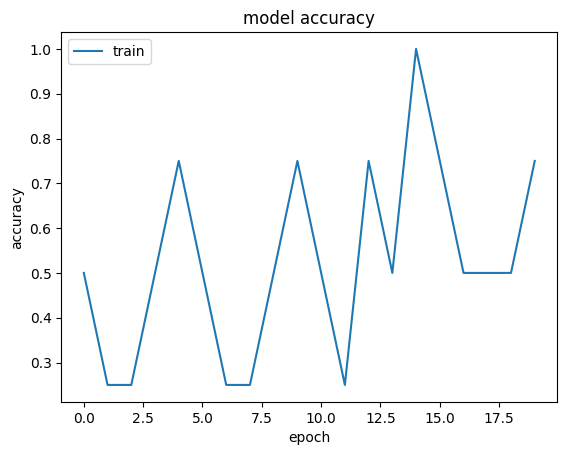

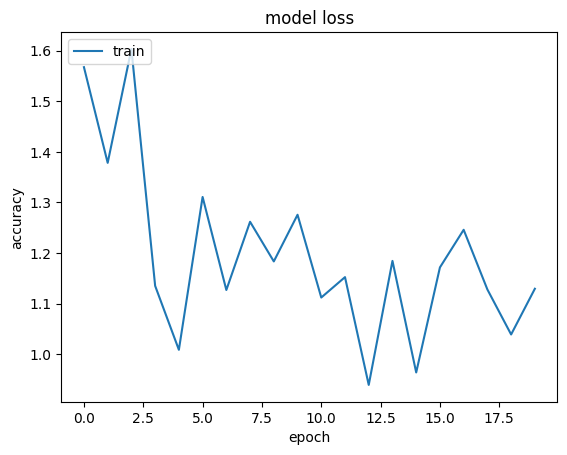

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,070 (801.06 KB)

 Trainable params: 68,356 (267.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,714 (534.04 KB)

In [3]:
# NOTE: Will partition code based on functions and classes only! At least for now


# Purpose: This file will contain code that helps with Model Development.
# Body of neccessary imports
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pdb as pb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
# end of body of neccessary imports
# Important Steps in Model Development: 1) Obtaining the training data, 2) Create the model containing initialized weights and a bais[which would be very involved with using numbers from certain columns], 3) Observe model's performance before training, 4) Defining a loss function for model, 5) Write a basic Training Loop
def attempt3():
    inNoteBook = False
    # Body of Neccessary Imports for Model Development.
    import numpy as np
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation, Dropout
    from tensorflow.keras.utils import to_categorical, plot_model
    from tensorflow.keras.datasets import mnist
    # End of Body of Neccessary Imports for Model Development.
    # NOTE: Below is used to modify network parameters using experiment setup func(s).
    global x_train; global x_test
    filePathToModelDir = "C:/Users/adoct/Notes for CSCE Classes[Fall 2025]/Notes for CSCE 585/ProjectRepo/projectCode/MLLifecycle/ModelDevelopment/preparedDataset.csv" if inNoteBook == False else "preparedDataset.csv"
    train_stocks = pd.read_csv(f"{filePathToModelDir}"); train_labels = test_labels = train_stocks.loc[:,"Company"] #<-- References labels which are derived from custom engineered dataset.
    del train_stocks["Unnamed: 0"]
    test_stocks = pd.read_csv(f"{filePathToModelDir}"); test_labels = train_stocks.loc[:,"Company"] #<-- References labels which are derived from custom engineered dataset.
    del test_stocks["Unnamed: 0"]
    x_train = train_stocks.loc[:,train_stocks.columns != "Optimality"]
    y_train = train_labels
    x_test = test_stocks.loc[:,train_stocks.columns != "Optimality"]
    y_test = test_labels
    # ^^ Above ensures that prediction labels are y and x references the data used to make said decision.
    # "Compute the number of labels"
    num_labels = len(np.unique(y_train))
    # "Convert to one-hot vector"[we converted the labels to one-hot vectors using to_categorical]
    y_train = to_categorical(y_train.index)
    y_test = to_categorical(y_test.index)
    input_size = len(train_stocks.columns)  #<-- input_size refers to number of attributes for each row tuple of data.
    # Establishing Network Parameters
    global batch_size, hidden_units, dropout
    global model #<-- Have this here, so Experimental Setup functions can tweak model as needed.
    batch_size = 128
    hidden_units = 256
    dropout = 0.45
    isExperimentSetup3Active = False
    model = Sequential()
    def experimentSetup0():
       # This will reference the default settings irrespective to experiments.
       # 1) Creating the Model.
        print("---Undergoing Experiment Setup #0---")
        model.add(Input((x_train.shape[1],)))
        model.add(Dense(hidden_units))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(hidden_units))
        model.add(Activation('relu')) if experimentSetup3() == None else experimentSetup3() #<-- This changes the Activation function, adhering to experimentSetup3!
        model.add(Dropout(dropout))
        model.add(Dense(num_labels))
        print("---End of Experiment Setup #0---")
        return
    def experimentSetup1():
        # Goal of exp: Want to see how model params affect the acuaracy of the model by modifying batch size and hidden units and dropout
        print("---Undergoing Experiment Setup #1---")
        setN = 1 #<-- Change number for this to get values from resp sets.
        experiment1Tuples: list[tuple] = [(128,256,0.45), (64,128,0.45), (128,256,0.3), ("""NOTE: Other tuples can change one or more parameters whilst keeping at least one constant""")]
        batch_size = experiment1Tuples[setN][0]
        hidden_units = experiment1Tuples[setN][1]
        dropout = experiment1Tuples[setN][2]
        print("---End of Experiment Setup #1---")
        return
    global listVerOfX_train
    listVerOfX_train = x_train.columns[:len(x_train.columns)-1].to_list()
    # ^^ Utilized to setup experiment #2 whose desc is below.
    def experimentSetup2(numQuantLvls = 2):
        # Goal of exp: Want to see model performance based on degree of quantanization of data
        print("---Undergoing Experiment Setup #2---")
        # NOTE: Below will involve replacing 255 with a different number based on degree of quantanization of data.
        # Using for loop to iterate through each column to apply this quantinization to each column.
        global x_train, x_test
        for i in listVerOfX_train:
            x_trainMax = x_train[i].max()
            x_trainMin = x_train[i].min()
            x_testMax = x_test[i].max()
            x_testMin = x_test[i].min()
            widthsOfQuant = [(x_trainMax - x_trainMin)/(numQuantLvls - 1),(x_testMax - x_testMin)/(numQuantLvls - 1)]
            x_train.loc[:,i] = x_train.loc[:,i]/widthsOfQuant[0]
            x_test.loc[:,i] = x_test.loc[:,i]/widthsOfQuant[0]
        print("---End of Experiment Setup #2---")
        return
    def experimentSetup3():
        # Goal of exp: Want to see model performance based on type of activation function from a subset of all possible activation functions.
        print("---Undergoing Experiment Setup #3---" if isExperimentSetup3Active else "---Experiment Setup #3 was skipped---")
        activationFuncs = ['elu', 'sigmoid', 'tanh' ]
        print("---End of Experiment Setup #3---" if isExperimentSetup3Active else "---End of Experiment Setup #3 was skipped---")
        return model.add(Activation(activationFuncs[0])) if isExperimentSetup3Active == True else None
    def experimentSetup4():
        print("---Undergoing Experiment Setup #4---")
        # Need to have an experiment that utilizes scaling analysis[in progress]
        print("---End of Experiment Setup #4---")
        return
    experimentSetup0()
    # experimentSetup1()
    experimentSetup2()
    # This is the output for one-hot vector, being sent into the softmax activation function.
    model.add(Activation('softmax'))
    model.summary()
    # 4) Defining the loss function and compiling model
    model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    # 5) Training the network
    x_train.loc[:,"Company"] = pd.Series([2**i for i in range(x_train.shape[0])])
    x_test.loc[:,"Company"] = pd.Series([2**i for i in range(x_train.shape[0])])
    x_train = x_train.astype("float64")
    x_test = x_test.astype("float64")
    x_train.loc[:,"Company"] = x_train.loc[:,"Company"].astype("int32")
    x_test.loc[:,"Company"] = x_test.loc[:,"Company"].astype("int32")
    x_trainCopy = tf.data.Dataset.from_tensor_slices((x_train.values.astype(np.float32),tf.convert_to_tensor(y_train).numpy().astype(np.float32)))
    x_testCopy = tf.data.Dataset.from_tensor_slices((x_test.values.astype(np.float32),tf.convert_to_tensor(y_test).numpy().astype(np.float32)))
    train_history = model.fit(x_train,y_train,epochs=20, batch_size=batch_size)
    # 6) Evaluating Model
    acc = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
    print("\nTest accuracy: %.1f%%" % (100.0 * acc[1]))
    test_stocks["Company"] = test_stocks.index; test_stocks.loc[:,"Company"] = test_stocks.loc[:,"Company"].astype("int32")
    # 6) Verifying and Visualzing the Predictions
    # a) Obtaining accuarrcy of the predictions:
    predictions = model.predict(x_test) #<-- NOTE: This retunrns an array of probabilities for each class. Thus, for future consumption by person, could assign these predictions to a column added to test_stocks?
    predictions[0]
    """
    # NOTE: Below will reference ways to transform predictions into string format to be able to utilzied for user consumption[DISREGARD #1: Only applicable to model integration into app]
    print(test_stocks[test_stocks["Optimality"] == np.argmax([predictions[0]])]["Company"].values[0])
    print("----")
    print(test_stocks[test_stocks["Optimality"] == np.argmax([x for x in predictions[1] if predictions[1].tolist().index(x) != np.argmax([predictions[0]])])]["Company"].values[0])
    print("----")
    print(test_stocks[test_stocks["Optimality"] == np.argmax([x for x in predictions[2] if predictions[2].tolist().index(x) != np.argmax([predictions[0]]) and predictions[2].tolist().index(x) != np.argmax([predictions[1]])])]["Company"].values[0])
    print("----")
    print(test_stocks[test_stocks["Optimality"] == np.argmax([x for x in predictions[3] if predictions[3].tolist().index(x) != np.argmax([predictions[0]]) and predictions[3].tolist().index(x) != np.argmax([predictions[1]]) and predictions[3].tolist().index(x) != np.argmax([predictions[2]])])]["Company"].values[0])
    print("----")
    # UPDATE: Above works, BUT the problem is that each prediction MUST be unique, and the predictions should be limited based on the value(s) of the previous prediction.
    # Attempt #1 At solution:
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[0])]["Company"].values[0])
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[1])]["Company"].values[0])
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[2])]["Company"].values[0])
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[3])]["Company"].values[0])
    # End of Attempt #1 At solution:
    # Attempt #2 At solution:
    np.argsort(predictions[0])
    np.argmax(predictions[0])
    [x for x in np.argsort(predictions[1]) if x != np.argmax(predictions[0])]
    np.argsort(predictions[1][np.argsort(predictions[0])[0]])
    [x for x in np.argsort(predictions[1]) if x != np.argmax(predictions[0])]
    np.argsort(predictions[2])
    [x for x in np.argsort(predictions[2]) if x != np.argmax(predictions[0]) and x!= np.argmax(predictions[1])]
    np.argsort(predictions[3])
    [x for x in np.argsort(predictions[3]) if x != np.argmax(predictions[0]) and x != np.argmax(predictions[1]) and x != np.argmax(predictions[2])]
    np.argmax(predictions[0])
    np.argmax([x for x in predictions[1] if predictions[1].tolist().index(x) not in [np.argmax(predictions[0])]])
    np.argmax([x for x in predictions[2] if predictions[2].tolist().index(x) not in [np.argmax(predictions[0]), np.argmax(predictions[1])]])
    np.argmax([x for x in predictions[3] if predictions[3].tolist().index(x) not in [np.argmax(predictions[0]), np.argmax(predictions[1]), np.argmax(predictions[2])]])
    # (cont here!)[UPDATE: Need to use np.argsort to ensure none of the labels chosen result in one label being chosen more than once! Refer to this link for assistance: https://www.geeksforgeeks.org/python/how-to-get-the-n-largest-values-of-an-array-using-numpy/][Attempt to acheive solution is below] [NOTE: Basic idea is this: np.argmax(predictions[2][:np.argmax(predictions[1])])]
    # End of Attempt #2 At solution:
    test_stocks.loc[:,"Company"] = train_stocks.loc[:,"Company"].astype("str") #<-- Used to convert one-hot encoding back into strings interpretable by users.
    # Attempt #3 At solution:
    np.argsort(predictions[0]) #<-- NOTE: argsort sorts argument indices in ascending order! [UPDATE: There is also an edge case, if preds coincidentally are the same, then the next maximum should be pulled instead]
    np.argsort(predictions[1])
    np.argsort(predictions[2])
    np.argsort(predictions[3])
    test_stocks[test_stocks["Optimality"] == np.argmax(predictions[0])]["Company"]
    test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[1]) if x != np.argsort(predictions[0])[-1]][-1]]["Company"]
    test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[2]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] ][-1]]["Company"]
    test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[3]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] and x != np.argsort(predictions[2])[-2]][0] ]["Company"]
    np.argmax(predictions[0])
    [x for x in np.argsort(predictions[1]) if x != np.argsort(predictions[0])[-1]][-1]
    [x for x in np.argsort(predictions[2]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] ][-1]
    [x for x in np.argsort(predictions[3]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] and x != np.argsort(predictions[2])[-2]]
    # UPDATE: Above works greatly when 4 companies are utilized. Now, focus shifts to programmatically adhering to situation for any finite amount of companies.
    conditions = []
    i = 1
    test_stocks.loc[:,"Company"] = train_stocks.loc[:,"Company"].astype("str") #<-- Used to convert one-hot encoding back into strings interpretable by users.
    print("--DEBUGGING CHECKPOINT: CHecking if algo works for any finite num of predictions---") # UPDATE: This process will be done after finishing up everything else.
    pb.set_trace()
    while i < (len(predictions)):
        # GOAL: a) Ensure that each prediction is unique, so a desired order can be implemented.
        lambda x: x != np.argsort(predictions[i - 1])[-1]
        conditions.append(lambda x: x != np.argsort(predictions[i - 1])[-1]) #<-- NOTE: Leaving x und   ef on purpose since it'll be defined in list comprehension below.
        # conditions.append(x != np.argsort(predictions[i - 1])[-1]) #<-- NOTE: Leaving x undef on purpose since it'll be defined in list comprehension below.
        # [x for x in np.argsort(predictions[1]) if x != np.argsort(predictions[0])[-1]][-1]
        print([x for x in np.argsort(predictions[i]) if conditions][-1])
        print("----")
        print(test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[1]) if conditions][-1]]["Company"])
        print("----")
        i += 1
    # End of Attempt #3 At solution:
    """
    # NOTE: Above will reference ways to transform predictions into string format to be able to utilzied for user consumption
    ## Listing all data in history:
    print(train_history.history.keys())
    ## summarize train_history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    ## summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.title('model loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # End of Body of plotting model
    # b) Printing Model Summary, which can be good to go into detail about:
    model.summary()
    # Body of saving model to a file to be used later
    # End of Body of saving model to a file to be used later
    # end of 6)
attempt3()


#### End of Model Development and Training Procedure

### End of Baseline Model Performance:  

## End of new, cleaned version of code

- Context: Then we set up the model parameters[part b)]: 

[note, make habit to employ content-codeSnippet pairs!][UPDATE: Another idea could be running the full file first, to get the output, and then having team partition the rest of the files!]
    

## End of Baseline Model Performance:  

## Experiment 1[Relationship between the Network Parameters]
### Purpose
- Setting up Classification problem and visualizing the model accuracy based on permutations of 3-tuple that references the model parameters. 
### Hypothesis
- I believe that the ratio of constants in the 3-tuple should be <> of the ML Model paramters for the ML Model's accurarcy to be greater than the ML Model's accuracy when the ratio is not used. 



### Instructions to Run
Instructions: 1) Installing Dependencies in kernel environment, 2) Initiating Data Engineering Pipeline, 3) Setting up Model, 4) Using three situations where the 3-tupeles are different. 



In [4]:
# Installing Dependencies and or code for setting up virtual environment: 
# Necessary imports
%uv pip install pandas 
%uv pip install numpy 
%uv pip install yfinance 
# Below is needed to get the real-time data
%uv pip install datetime
# UPDATE: timedelta will be used to programmatically do the optimality algorithm. Refer to notes on timedelta class for reference.  
%uv pip install pdb 
%uv pip install tensorflow 
%uv pip install matplotlib
# from matplotlib import pyplot 
%uv pip install pandas 
%uv pip install numpy 
%uv pip install pdb 
%uv pip install tensorflow





# End of Installing Dependencies and or code for setting up virtual environment: 


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv
c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv

Note: you may need to restart the kernel to use updated packages.



c:\Users\adoct\AppData\Local\Programs\Python\Python312\python.exe: No module named uv


Note: you may need to restart the kernel to use updated packages.


- Context: First we do the data preprocessing before it meets with the model[part a)]: [note, make habit to employ content-codeSnippet pairs!]


### Beginning of Data Engineering Procedure

In [5]:
# Necessary imports
import pandas as pd;
import numpy as np;
import yfinance as yf; #<-- Needed to access Yahoo Finance Dataset(s)
# Below is needed to get the real-time data
from datetime import datetime, timedelta, date
# UPDATE: timedelta will be used to programmatically do the optimality algorithm. Refer to notes on timedelta class for reference.
import pdb as pb
# End of Necessary imports
global seriesVersionOn
seriesVersionOn = True
global resultantDataFrame
resultantDataFrame: pd.DataFrame = pd.DataFrame(columns=["P/B", "P/E", "NCAV", "Date For Eval", "Company", "Optimality"])
resultantDataFrame["P/B"].astype("Float64")
resultantDataFrame["P/E"].astype("Float64")
resultantDataFrame["NCAV"].astype("Float64")
class subsys1:
    def __init__(self,param1 = """Insert any params that may be sufficient here!"""):
        print("---Subsystem 1 in Progress---")
    # component a) [mapping formulas using dep vars and indep vars]
    def compA(self,company):
        PRatioBug = True
        print("--Component a[Subsystem 1] in progress--")
        global arrOfDataFramesNeeded
        arrOfDataFramesNeeded = []
        # Obtaining the dataframes from the yfinance api for company i
        print("-Obtaining the DataFrames from the yfinance api for company i-")
        timePeriod = "4mo"
        timeInterval = "1mo"
        # Obtaining real-time data
        if (company == None):
            company = "MSFT"
        # companyAlias = company or "MSFT"
        companyAlias = company
        ticker = yf.Ticker(f"{companyAlias}")
        global end_date #<-- Setting global so end_date can be accessed.
        start_date: datetime = datetime.today() - timedelta(days=10) ; end_date = datetime.today()
        #^^ Setting start_date and end_date as arbitrary value relative to current day and current day respectively.
        yearsRelToDateInQ: datetime =  start_date - timedelta(days=5*365)
        start_date = start_date.date().isoformat()
        end_date = end_date.date().isoformat()
        historical_data = ticker.history(period=timePeriod, interval=timeInterval).tz_localize(None) if start_date == None and end_date == None else ticker.history(start=start_date, end=end_date).tz_localize(None)
        print(historical_data)
        # end of Obtaining real-time data
        # Obtaining historical data
        quarterlyBalanceSheet = ticker.quarterly_balance_sheet.T
        arrOfDataFramesNeeded = [historical_data, quarterlyBalanceSheet]
        print(quarterlyBalanceSheet)
        print(quarterlyBalanceSheet.columns)
        conditionForDataFrame2 = ticker.history(period="5y").tz_localize(None) #<-- Here, I set start date to first tuple's date from historical_data var and then get the data 5 yrs BACK relative to that date.
        balanceSheet = ticker.balance_sheet.T
        print(conditionForDataFrame2)
        arrOfDataFramesNeeded.append([conditionForDataFrame2])
        # end of Obtaining historical data
        print("-End of Obtaining the DataFrames from the yfinance api for company i-")
        # CHECKPOINT #1: At this point, datafmres will be obtained to begin process of assigning formulas.
        # End of Obtaining the dataframes from the yfinance api for company i
        boolExpMain = """Can insert a bool exp that checks for number of values in company column, indicating that dataFrame still exists"""
        alreadyExists = False if boolExpMain == True else True
        print("-Beginning of assigning formulas-")
        global independentVars
        independentVars = ["Close" if PRatioBug == False else "Open","Tangible Book Value","High","Retained Earnings","Net Tangible Assets"]
        global DependentVars
        DependentVars = ["P/B", "P/E", "NCAV", "Date For Eval"] #<-- PN: Date for Eval was created to reference the date to use to make relevant decisions.
        DependentVars.append("Share Price")
        global dataFramesToBeShipped
        dataFramesToBeShipped = [pd.DataFrame(), pd.DataFrame()]
        DependentVars.append("Company")
        # NOTE: alreadyExists prevents currentDataframe from being updated allowing other companies to be added to resultant dataframe.
        # Assigning the formulas
        print("-Assigning formulas-") # PARTITION #1: Need to split code off when porting to notebook here!
        pullingFromTickerInfo = True
        if not PRatioBug:
            dataFramesToBeShipped[0].loc[0,DependentVars[0]] = arrOfDataFramesNeeded[0].loc[arrOfDataFramesNeeded[0].index[0].date().isoformat(),independentVars[0]]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]]
            print("---")
            print(arrOfDataFramesNeeded[0].columns)
            print("---")
            print(arrOfDataFramesNeeded[0].loc[arrOfDataFramesNeeded[0].index[0].date().isoformat(),independentVars[0]])
            print(arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]])
            dataFramesToBeShipped[0].loc[0,DependentVars[1]] = arrOfDataFramesNeeded[0].loc[arrOfDataFramesNeeded[0].index[0].date().isoformat(),independentVars[2]]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[3]]
            dataFramesToBeShipped[0].loc[0,DependentVars[2]] = arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[4]] #<-- Here, NCAV comes from balance sheet.
            print(dataFramesToBeShipped[0])
            # end of Assigning the formulas
        elif PRatioBug and pullingFromTickerInfo == True:
            dataFramesToBeShipped[0].loc[0,DependentVars[0]] = ticker.info["priceToBook"]
            print("---")
            print(arrOfDataFramesNeeded[0].columns)
            print("---")
            print(ticker.info["regularMarketPrice"])
            print(arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]])
            dataFramesToBeShipped[0].loc[0,DependentVars[1]] = ticker.info["regularMarketPrice"]/ticker.info["earningsQuarterlyGrowth"]
            dataFramesToBeShipped[0].loc[0,DependentVars[2]] = arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[4]] #<-- Here, NCAV comes from balance sheet.
            print(dataFramesToBeShipped[0])
            dataFramesToBeShipped[0].loc[0,"Share Price"] = ticker.info["regularMarketPrice"]
            # end of Assigning the formulas
        else:
            print("--DEBUGGING CHECKPOINT: Adressing behavior causing error involving Share Price issue---")
            dataFramesToBeShipped[0].loc[0,DependentVars[0]] = ticker.info["regularMarketPrice"]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]]
            print("---")
            print(arrOfDataFramesNeeded[0].columns)
            print("---")
            print(ticker.info["regularMarketPrice"])
            print(arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[1]])
            dataFramesToBeShipped[0].loc[0,DependentVars[1]] = ticker.info["regularMarketPrice"]/arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[3]]
            dataFramesToBeShipped[0].loc[0,DependentVars[2]] = arrOfDataFramesNeeded[1].loc[arrOfDataFramesNeeded[1].index[0].date().isoformat(),independentVars[4]] #<-- Here, NCAV comes from balance sheet.
            print(dataFramesToBeShipped[0])
            # end of Assigning the formulas
        print("-End of assigning formulas-")
        if(seriesVersionOn):
            dataFramesToBeShipped[0].loc[0, "Company"] = companyAlias
        print("--Entering Debuging Mode for Checkpoint #2--")
        # CHECKPOINT #2: At this point, formulas will be assigned to neccessary dependent variables for datafrmae that will be output.
        print(dataFramesToBeShipped[0].columns)
        print("--End of Component a[Subsystem 1]--")
        resultantSeries = dataFramesToBeShipped[0]
        # Body of casting dates to cause assignment to be successful
        conditionForDataFrame2.index = conditionForDataFrame2.index.year
        balanceSheet.index = balanceSheet.index.year
        # End of Body of casting dates to cause assignment to be successful
        conditionForDataFrame2["P/E"] = conditionForDataFrame2[independentVars[0]]/balanceSheet.loc[:, "Retained Earnings"]
        conditionForDataFrame2 = conditionForDataFrame2[conditionForDataFrame2["P/E"].notnull()]
        newVersion = True
        return (dataFramesToBeShipped if seriesVersionOn == False else resultantSeries) if newVersion == False else (dataFramesToBeShipped if seriesVersionOn == False else [resultantSeries, conditionForDataFrame2])
        # end of component a)
        # component b) [Populating the new dataframe(s) and preparing dataFrames to be written to files[PN: Will mean that resultant dataframes must be copied to nonlocal variables so subsystem1 can access them(UPDATE: Decided to return the array of these dataframes instead)]
        # end of component b)
    # NOTE: Below was replaced by adding system to class's constructor!

class subsys2:
    def __init__(self,param1 = """Insert any params that may be sufficient here!"""):
        print("---Subsystem 2 in Progress---")
        # self.compA()
    # component a)[creating algorithm for assigning optimality for each company's value]
    def compA(self, param1 = """Insert any params that may be sufficient here!""", arrOfCompanies = []):
        # NOTE: Need to add a condition that ensures that dataframe is updated based on companies passed in.
        # UPDATE: replacing compA with version where only each company is required.
        global dataFrameReffingCompanyData
        version0 = False
        if version0 == True:
            for i in range(iterators):
                print("--Component a[Subsystem 2] in progress--")
                # Body of executing algorithm for strategy responsible for assigning optimality[NOTE: This only applies to retrievedDataFrame[0] since that'll be the training set one]
                # predicate wffs for conditions: i) stock(P/B) <= 1.0, ii) stock(P/E) < max(stockPE(P/E,5)), iii) stock(share price) < 0.67*tangible per-share book value[which can be found in historical_data], iv)  (cont here). where stockPE(x,y) = stock's x ratio in the past 5 years and returns z_i, where z_i = x ratio in year i and i \le y .  [predicate wffs written!]
                # Body of creating boolExp Array for respective conditions
                arrOfCompanies[i] = param1
                currCompany = arrOfCompanies[i]
                dataFrameWithCompanyAsAColumnId = subsys1.compA(company=currCompany)[0] #<-- Returns the dataframe referencing company data.
                dataFrameReffingCompanyData = dataFrameWithCompanyAsAColumnId
                dateInQuestion: datetime = end_date.fromisoformat(end_date)
                yr = 365;
                yearsRelToDateInQ: datetime = dateInQuestion - timedelta(days=5*yr)
                    # Obtaining stocks highest P/E over previous five years
                    # end of Obtaining Stocks highest P/E over previous five years
                arrForCondTwo: pd.DataFrame = arrOfDataFramesNeeded[len(arrOfDataFramesNeeded) - 1] #<-- Did this since I added the dataframe specifically for cond 2 at the END of arrOfDataFramesNeeded. [UPDATE: Need to replace this]
                highestP_EOvrFiveYrs: float = arrForCondTwo["P/E"].max() #<-- REPLACEMENT PENDING: will be replaced when above is filled in. [UPDATE: Using default operator logic to set val to trusy val if ither operand is undef. Will involve querying dataframe for maximum val in column]
                    # Body of creating boolExp Array for respective conditions
                boolExps: list[bool] = [
                        dataFrameReffingCompanyData["P/B" if currCompany == None else ("P/B",currCompany)] <= 1.0,
                    dataFrameReffingCompanyData["P/E" if currCompany == None else ("P/E",currCompany)] <= 0.4*highestP_EOvrFiveYrs,
                    dataFrameReffingCompanyData["Share Price" if currCompany == None else ("Share Price",currCompany)] < 0.67*dataFrameReffingCompanyData["Tangible Book Value" if currCompany == None else ("Tangible Book Value",currCompany)]
                ]
                    # End of Body of creating boolExp Array for respective conditions
                score = 0
                if boolExps[0]:
                    score += 1
                if boolExps[1]:
                    score += 1
                if boolExps[2]:
                    score += 1
                dataFrameReffingCompanyData["Optimality"] = score;
                # End of Body of executing algorithm for strategy responsible for assigning optimality
        else:
            # Version of code where only company[i] is proprioritezed and a series is returned with optimality there.
            print("--Component a[Subsystem 2] in progress--[VERSION #2]")
            currCompany = param1
            arrOfDataFramesNeeded = subsys1().compA(company=currCompany)
            dataFrameWithCompanyAsAColumnId = arrOfDataFramesNeeded[0]
            dataFrameReffingCompanyData = arrOfDataFramesNeeded[1]
            arrForCondTwo = arrOfDataFramesNeeded[1]
            # Body of version where compA(subsys1) returns TWO things
            dateInQuestion: datetime = datetime.fromisoformat(end_date)
            yr = 365;
            yearsRelToDateInQ: datetime = dateInQuestion - timedelta(days=5*yr)
                # Obtaining stocks highest P/E over previous five years[for assistance, use this search query: `? does ticker object have a start date parameter`]
                # end of Obtaining Stocks highest P/E over previous five years
            highestP_EOvrFiveYrs = arrForCondTwo["P/E"].max()
            dataFrameThatRefsSharePrice = dataFrameWithCompanyAsAColumnId #<-- This variable is self explanatory. Need to modify soon.
            """ boolExps: list[bool] = [
                    dataFrameReffingCompanyData["P/B"] <= 1.0,
                dataFrameReffingCompanyData["P/E"] <= 0.4*highestP_EOvrFiveYrs,
                dataFrameReffingCompanyData["Share Price"] < 0.67*dataFrameThatRefsSharePrice["Tangible Book Value"]
            ] """
            """ boolExps: list[bool] = [
                    dataFrameWithCompanyAsAColumnId["P/B"] <= 1.0,
                dataFrameWithCompanyAsAColumnId["P/E"] <= 0.4*highestP_EOvrFiveYrs,
                dataFrameWithCompanyAsAColumnId["Share Price"] < 0.67*dataFrameThatRefsSharePrice["Tangible Book Value"]
            ] """
            boolExps: list[bool] = [
                    dataFrameWithCompanyAsAColumnId["P/B"] <= 1.0,
                dataFrameWithCompanyAsAColumnId["P/E"] <= 0.4*highestP_EOvrFiveYrs,
                dataFrameWithCompanyAsAColumnId["Share Price"] < 0.67*(dataFrameWithCompanyAsAColumnId["Share Price"]/dataFrameThatRefsSharePrice["P/B"])
            ]
            # UPDATE: Problem originates from dataFrameThatRefsSharePrice["Tangible Book Value"][UPDATE: Problem fixed!]
                # End of Body of creating boolExp Array for respective conditions
            score = 0
            if boolExps[0].any():
                score += 1
            if boolExps[1].any():
                score += 1
            if boolExps[2].any():
                score += 1
            dataFrameWithCompanyAsAColumnId["Optimality"] = score; # UPDATE: Works as intended. Focu sshould shift back towards ensuring that Share Price thing works properly.
            # End of Body of executing algorithm for strategy responsible for assigning optimality
            print("--End of Component a[Subsystem 2] in progress--")
            return dataFrameWithCompanyAsAColumnId
# end of component a)
    # component b)
    def compB():
        print("--Component b[Subsystem 2] in progress--")
        global retreivedDataFrames
        retreivedDataFrames = [dataFrameReffingCompanyData,dataFrameReffingCompanyData] or pd.DataFrame()
        # Body of writing resp dataframes to files[need to use to_csv I believe]
        filePathToTrainingSetDir: str = "MLLifecycle/ModelDevelopment/TrainingSets"
        filePathToTestSetDir: str = "MLLifecycle/ModelDevelopment/TestingSets"
        print("--End of Component b[Subsystem 2]--")
        print("Entering Debuging Mode for Checkpoint #3")
        # CHECKPOINT #3: At this point, dataframes will be written to the neccessary files to be ingested by the Model.
        print("--Writing Dataframes for Model Ingestion--")
        retreivedDataFrames[0].to_csv(f'{filePathToTrainingSetDir}/trainingSet{setNum if setNum != None else 1}')
        retreivedDataFrames[1].to_csv(f'{filePathToTrainingSetDir}/testSet{setNum if setNum != None else 1}')
        # End of Body of writing resp dataframes to files
        print("--End of Writing Dataframes for Model Ingestion--")
        print("--End of Component b[Subsystem 2]--")
        return #<-- Testing version of return statement[anything above this return statement is sucessful and everything below hasn't been tested yet. THis is relative to each function]
    # end of component b)

def main(companies: list[str] = []):
    print("---Starting Data Prep Process---")
    # print("---DEBUGGING CHECKPOINT #1: Investigating companySeries value---")
    # pb.set_trace()
    if len(companies) == 0:
        companies: list[str] = ["GOOG","AAPL", "AMZN", "MSFT"] 
    
    listOfSeriesToCreateDataFrame = []
    for i in range(len(companies)):
        print(f"----Adding company {companies[i]} to engineered dataset----")
        # """
        # NOTE: Will uncomment, once everything with the functions used here is situated[add a checklist here: ]
        print("---Starting Subsystem 1---")
        # Call function referencing topmost subsystem #1 here:
        a: str = ""; b: str = ""
        subsys1().compA(company=companies[i])
        subsys2().compA(param1=companies[i])
        retSeries = True
        if retSeries:
            # ^^ NOTE: Above is returning a series each time[at least this is the assumption]
            companySeries = subsys2().compA(param1=companies[i])
            listOfSeriesToCreateDataFrame.append(companySeries)
        else:
            # ^^ NOTE: Above is NOT retruning a series
            print("---Assumption that series is NOT returned---")
        # Will replace above with this: subsys1(company_i)
        print("---End of Subsystem 1---")
        print(f"----End of Adding company {companies[i]} to engineered dataset----")
    
    resultantDataFrame = pd.concat([pd.DataFrame(x) for x in listOfSeriesToCreateDataFrame]).reset_index() #<-- used list comprehension to transform listOfSeries to resultantDataFrame.
    del resultantDataFrame['index']
    print(resultantDataFrame) #<-- THis dataframe will reference the dataframe that adheres to the follwowing object:
    # company(CompanyName, "P/B", "P/E", "NCAV", "Date For Eval", "Optimality", (cont here if applicable))[NOTE: Will be wise to make a Entity via ERDs for documentation when writing paper at end]
    inNoteBook = False
    filePathToModelDir = "C:/Users/adoct/Notes for CSCE Classes[Fall 2025]/Notes for CSCE 585/ProjectRepo/projectCode/MLLifecycle/ModelDevelopment/preparedDataset.csv" if inNoteBook == False else "preparedDataset.csv"
    # Body of handling edge case where all of them are same optimality
    resultantDataFrame.to_csv(f"{filePathToModelDir}")
    if((resultantDataFrame["Optimality"] == 0).all() == True):
        # Setting optimality column to be based on alphabetical ordering
        resultantDataFrame.sort_values(by='Company',inplace=True)
        resultantDataFrame = resultantDataFrame.set_index(np.arange(4))
        resultantDataFrame.loc[:,"Optimality"] = pd.Series(np.arange(resultantDataFrame["Optimality"].shape[0]))
        # End of Setting optimality column to be based on alphabetical ordering
        resultantDataFrame.to_csv(f"{filePathToModelDir}")
    # End of Body of handling edge case where all of them are same optimality
main()


---Starting Data Prep Process---
----Adding company GOOG to engineered dataset----
---Starting Subsystem 1---
---Subsystem 1 in Progress---
--Component a[Subsystem 1] in progress--
-Obtaining the DataFrames from the yfinance api for company i-
                  Open        High         Low       Close    Volume  \
Date                                                                   
2025-11-24  311.010010  319.799988  309.399994  318.470001  55311800   
2025-11-25  326.799988  328.670013  317.816010  323.640015  50899300   
2025-11-26  320.779999  324.989990  317.200012  320.279999  29839600   
2025-11-28  323.429993  326.880005  316.940002  320.119995  19695800   
2025-12-01  317.475006  319.630005  313.980011  315.119995  28520600   

            Dividends  Stock Splits  
Date                                 
2025-11-24        0.0           0.0  
2025-11-25        0.0           0.0  
2025-11-26        0.0           0.0  
2025-11-28        0.0           0.0  
2025-12-01        0.0  

### End of Data Engineering Procedure

#### Beginning of Model Development and Training Procedure

#### Testing out tuple (64,128,0.45) of network parameters

---Undergoing Experiment Setup #0---
---Experiment Setup #3 was skipped---
---End of Experiment Setup #3 was skipped---
---End of Experiment Setup #0---
---Undergoing Experiment Setup #1---
---End of Experiment Setup #1---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,356 (267.02 KB)

 Trainable params: 68,356 (267.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 32923623424.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2500 - loss: 15406700544.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 41685528576.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 37974171648.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: 14045806592.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 17021835264.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: 16900609024.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2500 - loss: 40189407232.0000
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2500 - loss: 21156569088.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0000e+00 - loss: 42779910144.0000
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step -

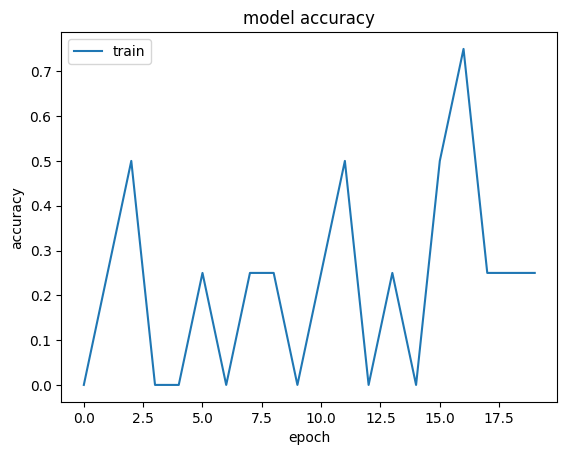

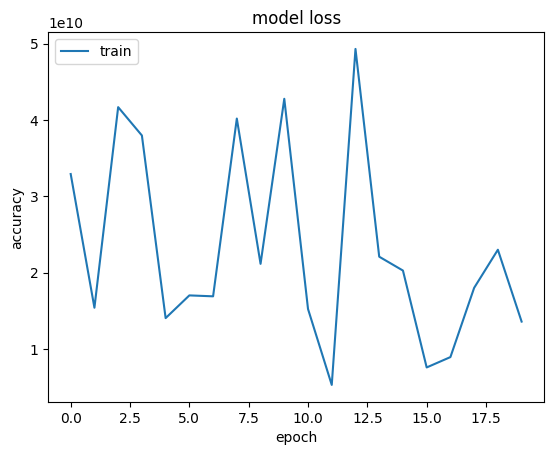

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,070 (801.06 KB)

 Trainable params: 68,356 (267.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,714 (534.04 KB)

In [ ]:
# NOTE: Will partition code based on functions and classes only! At least for now


# Purpose: This file will contain code that helps with Model Development.
# Body of neccessary imports
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pdb as pb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
# end of body of neccessary imports
# Important Steps in Model Development: 1) Obtaining the training data, 2) Create the model containing initialized weights and a bais[which would be very involved with using numbers from certain columns], 3) Observe model's performance before training, 4) Defining a loss function for model, 5) Write a basic Training Loop
def attempt3():
    inNoteBook = False
    # Body of Neccessary Imports for Model Development.
    import numpy as np
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation, Dropout
    from tensorflow.keras.utils import to_categorical, plot_model
    from tensorflow.keras.datasets import mnist
    # End of Body of Neccessary Imports for Model Development.
    # NOTE: Below is used to modify network parameters using experiment setup func(s).
    global x_train; global x_test
    filePathToModelDir = "C:/Users/adoct/Notes for CSCE Classes[Fall 2025]/Notes for CSCE 585/ProjectRepo/projectCode/MLLifecycle/ModelDevelopment/preparedDataset.csv" if inNoteBook == False else "preparedDataset.csv"
    train_stocks = pd.read_csv(f"{filePathToModelDir}"); train_labels = test_labels = train_stocks.loc[:,"Company"] #<-- References labels which are derived from custom engineered dataset.
    del train_stocks["Unnamed: 0"]
    test_stocks = pd.read_csv(f"{filePathToModelDir}"); test_labels = train_stocks.loc[:,"Company"] #<-- References labels which are derived from custom engineered dataset.
    del test_stocks["Unnamed: 0"]
    x_train = train_stocks.loc[:,train_stocks.columns != "Optimality"]
    y_train = train_labels
    x_test = test_stocks.loc[:,train_stocks.columns != "Optimality"]
    y_test = test_labels
    # ^^ Above ensures that prediction labels are y and x references the data used to make said decision.
    # "Compute the number of labels"
    num_labels = len(np.unique(y_train))
    # "Convert to one-hot vector"[we converted the labels to one-hot vectors using to_categorical]
    y_train = to_categorical(y_train.index)
    y_test = to_categorical(y_test.index)
    input_size = len(train_stocks.columns)  #<-- input_size refers to number of attributes for each row tuple of data.
    # Establishing Network Parameters
    global batch_size, hidden_units, dropout
    global model #<-- Have this here, so Experimental Setup functions can tweak model as needed.
    batch_size = 128
    hidden_units = 256
    dropout = 0.45
    isExperimentSetup3Active = False
    model = Sequential()
    def experimentSetup0():
       # This will reference the default settings irrespective to experiments.
       # 1) Creating the Model.
        print("---Undergoing Experiment Setup #0---")
        model.add(Input((x_train.shape[1],)))
        model.add(Dense(hidden_units))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(hidden_units))
        model.add(Activation('relu')) if experimentSetup3() == None else experimentSetup3() #<-- This changes the Activation function, adhering to experimentSetup3!
        model.add(Dropout(dropout))
        model.add(Dense(num_labels))
        print("---End of Experiment Setup #0---")
        return
    def experimentSetup1():
        # Goal of exp: Want to see how model params affect the acuaracy of the model by modifying batch size and hidden units and dropout
        print("---Undergoing Experiment Setup #1---")
        setN = 1 #<-- Change number for this to get values from resp sets.
        experiment1Tuples: list[tuple] = [(128,256,0.45), (64,128,0.45), (128,256,0.3), ("""NOTE: Other tuples can change one or more parameters whilst keeping at least one constant""")]
        batch_size = experiment1Tuples[setN][0]
        hidden_units = experiment1Tuples[setN][1]
        dropout = experiment1Tuples[setN][2]
        print("---End of Experiment Setup #1---")
        return
    global listVerOfX_train
    listVerOfX_train = x_train.columns[:len(x_train.columns)-1].to_list()
    # ^^ Utilized to setup experiment #2 whose desc is below.
    def experimentSetup2(numQuantLvls = 2):
        # Goal of exp: Want to see model performance based on degree of quantanization of data
        print("---Undergoing Experiment Setup #2---")
        # NOTE: Below will involve replacing 255 with a different number based on degree of quantanization of data.
        # Using for loop to iterate through each column to apply this quantinization to each column.
        global x_train, x_test
        for i in listVerOfX_train:
            x_trainMax = x_train[i].max()
            x_trainMin = x_train[i].min()
            x_testMax = x_test[i].max()
            x_testMin = x_test[i].min()
            widthsOfQuant = [(x_trainMax - x_trainMin)/(numQuantLvls - 1),(x_testMax - x_testMin)/(numQuantLvls - 1)]
            x_train.loc[:,i] = x_train.loc[:,i]/widthsOfQuant[0]
            x_test.loc[:,i] = x_test.loc[:,i]/widthsOfQuant[0]
        print("---End of Experiment Setup #2---")
        return
    def experimentSetup3():
        # Goal of exp: Want to see model performance based on type of activation function from a subset of all possible activation functions.
        print("---Undergoing Experiment Setup #3---" if isExperimentSetup3Active else "---Experiment Setup #3 was skipped---")
        activationFuncs = ['elu', 'sigmoid', 'tanh' ]
        print("---End of Experiment Setup #3---" if isExperimentSetup3Active else "---End of Experiment Setup #3 was skipped---")
        return model.add(Activation(activationFuncs[0])) if isExperimentSetup3Active == True else None
    def experimentSetup4():
        print("---Undergoing Experiment Setup #4---")
        # Need to have an experiment that utilizes scaling analysis[in progress]
        print("---End of Experiment Setup #4---")
        return
    experimentSetup0()
    experimentSetup1()
    # This is the output for one-hot vector, being sent into the softmax activation function.
    model.add(Activation('softmax'))
    model.summary()
    # 4) Defining the loss function and compiling model
    model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    # 5) Training the network
    x_train.loc[:,"Company"] = pd.Series([2**i for i in range(x_train.shape[0])])
    x_test.loc[:,"Company"] = pd.Series([2**i for i in range(x_train.shape[0])])
    x_train = x_train.astype("float64")
    x_test = x_test.astype("float64")
    x_train.loc[:,"Company"] = x_train.loc[:,"Company"].astype("int32")
    x_test.loc[:,"Company"] = x_test.loc[:,"Company"].astype("int32")
    x_trainCopy = tf.data.Dataset.from_tensor_slices((x_train.values.astype(np.float32),tf.convert_to_tensor(y_train).numpy().astype(np.float32)))
    x_testCopy = tf.data.Dataset.from_tensor_slices((x_test.values.astype(np.float32),tf.convert_to_tensor(y_test).numpy().astype(np.float32)))
    train_history = model.fit(x_train,y_train,epochs=20, batch_size=batch_size)
    # 6) Evaluating Model
    acc = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
    print("\nTest accuracy: %.1f%%" % (100.0 * acc[1]))
    test_stocks["Company"] = test_stocks.index; test_stocks.loc[:,"Company"] = test_stocks.loc[:,"Company"].astype("int32")
    # 6) Verifying and Visualzing the Predictions
    # a) Obtaining accuarrcy of the predictions:
    predictions = model.predict(x_test) #<-- NOTE: This retunrns an array of probabilities for each class. Thus, for future consumption by person, could assign these predictions to a column added to test_stocks?
    predictions[0]


    # NOTE: Above will reference ways to transform predictions into string format to be able to utilzied for user consumption
    ## Listing all data in history:
    print(train_history.history.keys())
    ## summarize train_history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    ## summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.title('model loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # End of Body of plotting model
    # b) Printing Model Summary, which can be good to go into detail about:
    model.summary()
    # Body of saving model to a file to be used later
    # End of Body of saving model to a file to be used later
    # end of 6)
attempt3()


#### End of Testing out tuple (64,128,0.45) of network parameters

#### Testing out tuple (128,256,0.3) of network parameters

---Undergoing Experiment Setup #0---
---Experiment Setup #3 was skipped---
---End of Experiment Setup #3 was skipped---
---End of Experiment Setup #0---
---Undergoing Experiment Setup #1---
---End of Experiment Setup #1---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,356 (267.02 KB)

 Trainable params: 68,356 (267.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 59935891456.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0000e+00 - loss: 35838607360.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: 49170890752.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 3276585472.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 5477724160.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2500 - loss: 8435299840.0000
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2500 - loss: 25410537472.0000
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2500 - loss: 14195355648.0000
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2500 - loss: 8753981440.0000
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.2500 - loss: 29861187584.0000
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.00

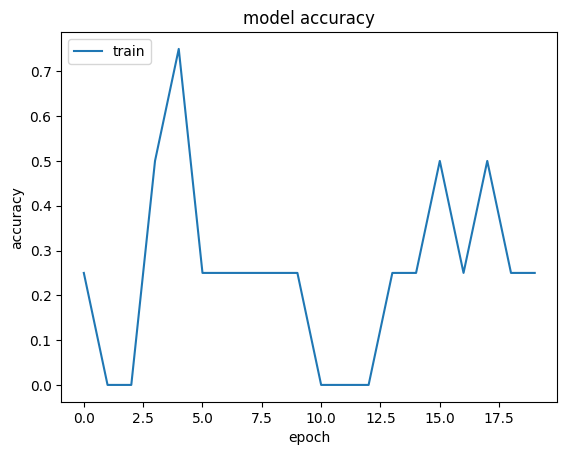

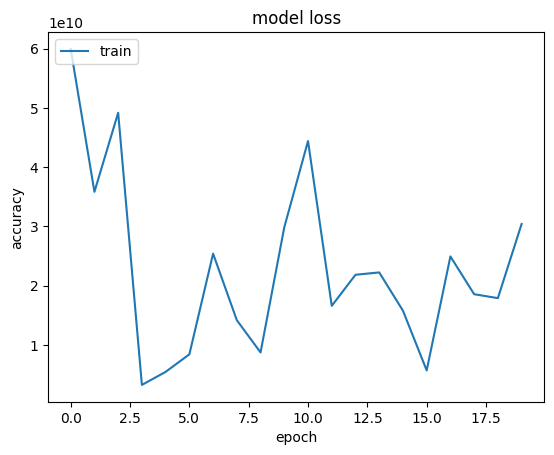

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,070 (801.06 KB)

 Trainable params: 68,356 (267.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 136,714 (534.04 KB)

In [7]:
# NOTE: Will partition code based on functions and classes only! At least for now


# Purpose: This file will contain code that helps with Model Development.
# Body of neccessary imports
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pdb as pb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
# end of body of neccessary imports
# Important Steps in Model Development: 1) Obtaining the training data, 2) Create the model containing initialized weights and a bais[which would be very involved with using numbers from certain columns], 3) Observe model's performance before training, 4) Defining a loss function for model, 5) Write a basic Training Loop
def attempt3():
    inNoteBook = False
    # Body of Neccessary Imports for Model Development.
    import numpy as np
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Activation, Dropout
    from tensorflow.keras.utils import to_categorical, plot_model
    from tensorflow.keras.datasets import mnist
    # End of Body of Neccessary Imports for Model Development.
    # NOTE: Below is used to modify network parameters using experiment setup func(s).
    global x_train; global x_test
    filePathToModelDir = "C:/Users/adoct/Notes for CSCE Classes[Fall 2025]/Notes for CSCE 585/ProjectRepo/projectCode/MLLifecycle/ModelDevelopment/preparedDataset.csv" if inNoteBook == False else "preparedDataset.csv"
    train_stocks = pd.read_csv(f"{filePathToModelDir}"); train_labels = test_labels = train_stocks.loc[:,"Company"] #<-- References labels which are derived from custom engineered dataset.
    del train_stocks["Unnamed: 0"]
    test_stocks = pd.read_csv(f"{filePathToModelDir}"); test_labels = train_stocks.loc[:,"Company"] #<-- References labels which are derived from custom engineered dataset.
    del test_stocks["Unnamed: 0"]
    x_train = train_stocks.loc[:,train_stocks.columns != "Optimality"]
    y_train = train_labels
    x_test = test_stocks.loc[:,train_stocks.columns != "Optimality"]
    y_test = test_labels
    # ^^ Above ensures that prediction labels are y and x references the data used to make said decision.
    # "Compute the number of labels"
    num_labels = len(np.unique(y_train))
    # "Convert to one-hot vector"[we converted the labels to one-hot vectors using to_categorical]
    y_train = to_categorical(y_train.index)
    y_test = to_categorical(y_test.index)
    input_size = len(train_stocks.columns)  #<-- input_size refers to number of attributes for each row tuple of data.
    # Establishing Network Parameters
    global batch_size, hidden_units, dropout
    global model #<-- Have this here, so Experimental Setup functions can tweak model as needed.
    batch_size = 128
    hidden_units = 256
    dropout = 0.45
    isExperimentSetup3Active = False
    model = Sequential()
    def experimentSetup0():
       # This will reference the default settings irrespective to experiments.
       # 1) Creating the Model.
        print("---Undergoing Experiment Setup #0---")
        model.add(Input((x_train.shape[1],)))
        model.add(Dense(hidden_units))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(hidden_units))
        model.add(Activation('relu')) if experimentSetup3() == None else experimentSetup3() #<-- This changes the Activation function, adhering to experimentSetup3!
        model.add(Dropout(dropout))
        model.add(Dense(num_labels))
        print("---End of Experiment Setup #0---")
        return
    def experimentSetup1():
        # Goal of exp: Want to see how model params affect the acuaracy of the model by modifying batch size and hidden units and dropout
        print("---Undergoing Experiment Setup #1---")
        setN = 2 #<-- Change number for this to get values from resp sets.
        experiment1Tuples: list[tuple] = [(128,256,0.45), (64,128,0.45), (128,256,0.3), ("""NOTE: Other tuples can change one or more parameters whilst keeping at least one constant""")]
        batch_size = experiment1Tuples[setN][0]
        hidden_units = experiment1Tuples[setN][1]
        dropout = experiment1Tuples[setN][2]
        print("---End of Experiment Setup #1---")
        return
    global listVerOfX_train
    listVerOfX_train = x_train.columns[:len(x_train.columns)-1].to_list()
    # ^^ Utilized to setup experiment #2 whose desc is below.
    def experimentSetup2(numQuantLvls = 2):
        # Goal of exp: Want to see model performance based on degree of quantanization of data
        print("---Undergoing Experiment Setup #2---")
        # NOTE: Below will involve replacing 255 with a different number based on degree of quantanization of data.
        # Using for loop to iterate through each column to apply this quantinization to each column.
        global x_train, x_test
        for i in listVerOfX_train:
            x_trainMax = x_train[i].max()
            x_trainMin = x_train[i].min()
            x_testMax = x_test[i].max()
            x_testMin = x_test[i].min()
            widthsOfQuant = [(x_trainMax - x_trainMin)/(numQuantLvls - 1),(x_testMax - x_testMin)/(numQuantLvls - 1)]
            x_train.loc[:,i] = x_train.loc[:,i]/widthsOfQuant[0]
            x_test.loc[:,i] = x_test.loc[:,i]/widthsOfQuant[0]
        print("---End of Experiment Setup #2---")
        return
    def experimentSetup3():
        # Goal of exp: Want to see model performance based on type of activation function from a subset of all possible activation functions.
        print("---Undergoing Experiment Setup #3---" if isExperimentSetup3Active else "---Experiment Setup #3 was skipped---")
        activationFuncs = ['elu', 'sigmoid', 'tanh' ]
        print("---End of Experiment Setup #3---" if isExperimentSetup3Active else "---End of Experiment Setup #3 was skipped---")
        return model.add(Activation(activationFuncs[0])) if isExperimentSetup3Active == True else None
    def experimentSetup4():
        print("---Undergoing Experiment Setup #4---")
        # Need to have an experiment that utilizes scaling analysis[in progress]
        print("---End of Experiment Setup #4---")
        return
    experimentSetup0()
    experimentSetup1()
    # This is the output for one-hot vector, being sent into the softmax activation function.
    model.add(Activation('softmax'))
    model.summary()
    # 4) Defining the loss function and compiling model
    model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
    # 5) Training the network
    x_train.loc[:,"Company"] = pd.Series([2**i for i in range(x_train.shape[0])])
    x_test.loc[:,"Company"] = pd.Series([2**i for i in range(x_train.shape[0])])
    x_train = x_train.astype("float64")
    x_test = x_test.astype("float64")
    x_train.loc[:,"Company"] = x_train.loc[:,"Company"].astype("int32")
    x_test.loc[:,"Company"] = x_test.loc[:,"Company"].astype("int32")
    x_trainCopy = tf.data.Dataset.from_tensor_slices((x_train.values.astype(np.float32),tf.convert_to_tensor(y_train).numpy().astype(np.float32)))
    x_testCopy = tf.data.Dataset.from_tensor_slices((x_test.values.astype(np.float32),tf.convert_to_tensor(y_test).numpy().astype(np.float32)))
    train_history = model.fit(x_train,y_train,epochs=20, batch_size=batch_size)
    # 6) Evaluating Model
    acc = model.evaluate(x_test, y_test, batch_size=batch_size,verbose=0)
    print("\nTest accuracy: %.1f%%" % (100.0 * acc[1]))
    test_stocks["Company"] = test_stocks.index; test_stocks.loc[:,"Company"] = test_stocks.loc[:,"Company"].astype("int32")
    # 6) Verifying and Visualzing the Predictions
    # a) Obtaining accuarrcy of the predictions:
    predictions = model.predict(x_test) #<-- NOTE: This retunrns an array of probabilities for each class. Thus, for future consumption by person, could assign these predictions to a column added to test_stocks?
    predictions[0]
    """
    # NOTE: Below will reference ways to transform predictions into string format to be able to utilzied for user consumption[DISREGARD #1: Only applicable to model integration into app]
    print(test_stocks[test_stocks["Optimality"] == np.argmax([predictions[0]])]["Company"].values[0])
    print("----")
    print(test_stocks[test_stocks["Optimality"] == np.argmax([x for x in predictions[1] if predictions[1].tolist().index(x) != np.argmax([predictions[0]])])]["Company"].values[0])
    print("----")
    print(test_stocks[test_stocks["Optimality"] == np.argmax([x for x in predictions[2] if predictions[2].tolist().index(x) != np.argmax([predictions[0]]) and predictions[2].tolist().index(x) != np.argmax([predictions[1]])])]["Company"].values[0])
    print("----")
    print(test_stocks[test_stocks["Optimality"] == np.argmax([x for x in predictions[3] if predictions[3].tolist().index(x) != np.argmax([predictions[0]]) and predictions[3].tolist().index(x) != np.argmax([predictions[1]]) and predictions[3].tolist().index(x) != np.argmax([predictions[2]])])]["Company"].values[0])
    print("----")
    # UPDATE: Above works, BUT the problem is that each prediction MUST be unique, and the predictions should be limited based on the value(s) of the previous prediction.
    # Attempt #1 At solution:
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[0])]["Company"].values[0])
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[1])]["Company"].values[0])
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[2])]["Company"].values[0])
    print(test_stocks[test_stocks["Optimality"] == np.argmax(predictions[3])]["Company"].values[0])
    # End of Attempt #1 At solution:
    # Attempt #2 At solution:
    np.argsort(predictions[0])
    np.argmax(predictions[0])
    [x for x in np.argsort(predictions[1]) if x != np.argmax(predictions[0])]
    np.argsort(predictions[1][np.argsort(predictions[0])[0]])
    [x for x in np.argsort(predictions[1]) if x != np.argmax(predictions[0])]
    np.argsort(predictions[2])
    [x for x in np.argsort(predictions[2]) if x != np.argmax(predictions[0]) and x!= np.argmax(predictions[1])]
    np.argsort(predictions[3])
    [x for x in np.argsort(predictions[3]) if x != np.argmax(predictions[0]) and x != np.argmax(predictions[1]) and x != np.argmax(predictions[2])]
    np.argmax(predictions[0])
    np.argmax([x for x in predictions[1] if predictions[1].tolist().index(x) not in [np.argmax(predictions[0])]])
    np.argmax([x for x in predictions[2] if predictions[2].tolist().index(x) not in [np.argmax(predictions[0]), np.argmax(predictions[1])]])
    np.argmax([x for x in predictions[3] if predictions[3].tolist().index(x) not in [np.argmax(predictions[0]), np.argmax(predictions[1]), np.argmax(predictions[2])]])
    # (cont here!)[UPDATE: Need to use np.argsort to ensure none of the labels chosen result in one label being chosen more than once! Refer to this link for assistance: https://www.geeksforgeeks.org/python/how-to-get-the-n-largest-values-of-an-array-using-numpy/][Attempt to acheive solution is below] [NOTE: Basic idea is this: np.argmax(predictions[2][:np.argmax(predictions[1])])]
    # End of Attempt #2 At solution:
    test_stocks.loc[:,"Company"] = train_stocks.loc[:,"Company"].astype("str") #<-- Used to convert one-hot encoding back into strings interpretable by users.
    # Attempt #3 At solution:
    np.argsort(predictions[0]) #<-- NOTE: argsort sorts argument indices in ascending order! [UPDATE: There is also an edge case, if preds coincidentally are the same, then the next maximum should be pulled instead]
    np.argsort(predictions[1])
    np.argsort(predictions[2])
    np.argsort(predictions[3])
    test_stocks[test_stocks["Optimality"] == np.argmax(predictions[0])]["Company"]
    test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[1]) if x != np.argsort(predictions[0])[-1]][-1]]["Company"]
    test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[2]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] ][-1]]["Company"]
    test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[3]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] and x != np.argsort(predictions[2])[-2]][0] ]["Company"]
    np.argmax(predictions[0])
    [x for x in np.argsort(predictions[1]) if x != np.argsort(predictions[0])[-1]][-1]
    [x for x in np.argsort(predictions[2]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] ][-1]
    [x for x in np.argsort(predictions[3]) if x != np.argsort(predictions[0])[-1] and x != np.argsort(predictions[1])[-1] and x != np.argsort(predictions[2])[-2]]
    # UPDATE: Above works greatly when 4 companies are utilized. Now, focus shifts to programmatically adhering to situation for any finite amount of companies.
    conditions = []
    i = 1
    test_stocks.loc[:,"Company"] = train_stocks.loc[:,"Company"].astype("str") #<-- Used to convert one-hot encoding back into strings interpretable by users.
    print("--DEBUGGING CHECKPOINT: CHecking if algo works for any finite num of predictions---") # UPDATE: This process will be done after finishing up everything else.
    pb.set_trace()
    while i < (len(predictions)):
        # GOAL: a) Ensure that each prediction is unique, so a desired order can be implemented.
        lambda x: x != np.argsort(predictions[i - 1])[-1]
        conditions.append(lambda x: x != np.argsort(predictions[i - 1])[-1]) #<-- NOTE: Leaving x und   ef on purpose since it'll be defined in list comprehension below.
        # conditions.append(x != np.argsort(predictions[i - 1])[-1]) #<-- NOTE: Leaving x undef on purpose since it'll be defined in list comprehension below.
        # [x for x in np.argsort(predictions[1]) if x != np.argsort(predictions[0])[-1]][-1]
        print([x for x in np.argsort(predictions[i]) if conditions][-1])
        print("----")
        print(test_stocks[test_stocks["Optimality"] == [x for x in np.argsort(predictions[1]) if conditions][-1]]["Company"])
        print("----")
        i += 1
    # End of Attempt #3 At solution:
    """
    # NOTE: Above will reference ways to transform predictions into string format to be able to utilzied for user consumption
    ## Listing all data in history:
    print(train_history.history.keys())
    ## summarize train_history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    ## summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.title('model loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # End of Body of plotting model
    # b) Printing Model Summary, which can be good to go into detail about:
    model.summary()
    # Body of saving model to a file to be used later
    # End of Body of saving model to a file to be used later
    # end of 6)
attempt3()


#### End of Testing out tuple (128,256,0.3) of network parameters

#### End of Model Development and Training Procedure

- Context: Then we set up the model parameters[part b)]: 

[note, make habit to employ content-codeSnippet pairs!][UPDATE: Another idea could be running the full file first, to get the output, and then having team partition the rest of the files!]
    

- Context: Then we set up the model parameters[part b)]: 

[note, make habit to employ content-codeSnippet pairs!][UPDATE: Another idea could be running the full file first, to get the output, and then having team partition the rest of the files!]
    

### Results 
- Context: [note, make habit to employ content-codeSnippet pairs![Make sure results section consists of python code that utilizes data visualization]


In [8]:
# Insert code that displays data visualization here[COMPLETE, can be seen above. At this point, need to copy and paste above, as template for next experiment below!][UPDATE: Data visulaization is shown all in one cell above, need to partition tho in future. ]

### Conclusion
- Context: [make sure this portion consists of summary of results and determine if hypothesis was met or unmet]